In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import scipy.io as sio
from spectral import *
from scipy.io import loadmat
import random
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
def read_HSI():
    X = loadmat('PaviaU.mat')['paviaU']
    y = loadmat('PaviaU_gt.mat')['paviaU_gt']
    print(f"X shape:{X.shape}\ny shape: {y.shape}")
    return X,y
X, y = read_HSI()

X shape:(610, 340, 103)
y shape: (610, 340)


(610, 340, 103)
(610, 340, 50)


ImageView object:
  Display bands       :  [0, 25.0, 49]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.19998905367963424, 0.42093800449768304]
    G: [-0.13716286407871464, 0.11644364019305035]
    B: [-0.05839864417045752, 0.0824347008494835]

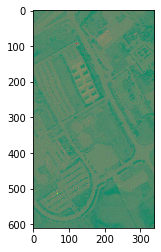

In [4]:
from spectral import *

signal = calc_stats(X)
noise = noise_from_diffs(X)
mnfr = mnf(signal, noise)

denoised = mnfr.denoise(X, snr=10)

print(denoised.shape)

dataset = mnfr.reduce(X, num=50)
print(dataset.shape)

imshow(dataset)

In [15]:
def extract_pixels(dataset,y):
    q = dataset.reshape(-1,dataset.shape[2])
    df = pd.DataFrame(data=q)
    df = pd.concat([df,pd.DataFrame(data = y.ravel())], axis=1)
    df.columns = [f'band{i}' for i in range(1,1+dataset.shape[2])]+['class']
    df.to_csv('Dataset.csv')
    return df
df = extract_pixels(dataset,y)

In [17]:
df = pd.read_csv("Dataset.csv")
df

,Unnamed: 0,band1,band2,band3,band4,band5,band6,band7,band8,band9,...,band42,band43,band44,band45,band46,band47,band48,band49,band50,class
0,0,-0.099097,-0.010031,0.028476,0.024911,0.017351,0.008314,-0.030329,-0.000734,-0.022879,...,-0.000250,-0.004131,0.002587,0.000395,0.000360,-0.000832,-0.000774,-0.003664,0.001198,0
1,1,-0.061687,0.010315,0.029914,0.027676,0.011152,-0.003228,-0.024089,-0.004417,-0.017109,...,-0.001314,0.000762,0.001836,0.000427,0.004417,-0.002037,0.001726,-0.000182,0.002942,0
2,2,-0.045856,0.022868,0.033607,0.003172,0.014346,0.009687,-0.020725,0.005573,-0.002035,...,-0.000439,-0.000304,-0.000183,0.000380,-0.002146,0.000535,0.002140,0.000049,-0.000366,0
3,3,-0.063592,0.013061,0.024660,0.016267,0.017947,0.002025,-0.021966,-0.005527,-0.010326,...,0.000402,-0.001963,-0.001114,-0.002301,0.003002,-0.001223,-0.001861,-0.002407,0.002564,0
4,4,-0.047579,0.021673,0.022753,0.006877,0.012365,-0.011396,-0.018496,0.006221,-0.004367,...,-0.000048,0.000621,0.002216,-0.000057,0.000621,0.001100,0.000769,-0.000467,0.001583,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207395,207395,-0.016943,0.026806,0.004559,-0.006536,-0.005394,0.003996,0.005813,-0.002737,0.006426,...,0.000298,0.000555,-0.001804,-0.001054,-0.001371,0.002341,-0.001138,0.001329,-0.001302,0
207396,207396,-0.020087,0.021523,0.006705,-0.008909,-0.007710,0.004823,0.002876,-0.004995,0.017313,...,-0.001845,0.000057,0.002689,0.001387,0.000442,-0.000457,-0.001309,0.000516,0.002176,0
207397,207397,-0.030223,0.019537,0.006201,-0.005945,-0.009567,-0.003807,0.008611,0.000304,0.006058,...,-0.000893,0.001911,-0.000787,0.001914,0.000696,0.001220,0.001862,0.001591,-0.000190,0
207398,207398,-0.023888,0.018784,0.009122,-0.000597,-0.004989,-0.006635,0.007006,-0.004011,0.015858,...,-0.001125,-0.001488,-0.000826,0.001918,-0.001288,0.003698,-0.000661,0.002079,-0.000116,0


In [27]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X.shape, y.shape

((207400, 51), (207400,))

In [28]:
X_train, X_test, y_train, y_test, indices_train, indices_test  = train_test_split(X, y,  range(X.shape[0]), 
                                                                                  test_size = 0.2, random_state = 6)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
classifier_knn = KNeighborsClassifier(n_neighbors = 3)
classifier_knn.fit(X_train, y_train)

y_pred = classifier_knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,"%")
error = 100-(accuracy*100)
print("Error %age:",error)

Accuracy: 94.73240115718419 %
Error %age: 5.267598842815815
